In [3]:
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomCrop,RandomHorizontalFlip,Normalize
import torchvision.transforms as T

In [4]:
# 전처리 과정
transforms = Compose(
    [RandomCrop((32,32), padding=4),
    RandomHorizontalFlip(p=0.5),  # 이미지를 좌우반전 시키는 것
    T.ToTensor(),
    Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261))]  # 정규화                  
)

train_data = CIFAR10(root='./', train=True, download=True, transform=transforms)
test_data = CIFAR10(root='./', train=False, download=True, transform=transforms)

100.0%


In [9]:
train_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
train_data.targets[0] # 6번째

6

In [6]:
train_data.data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
train_data.data[0].shape

(32, 32, 3)

In [14]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [15]:
img_data = iter(train_loader)
images,labels = next(img_data)

images.shape

torch.Size([32, 3, 32, 32])

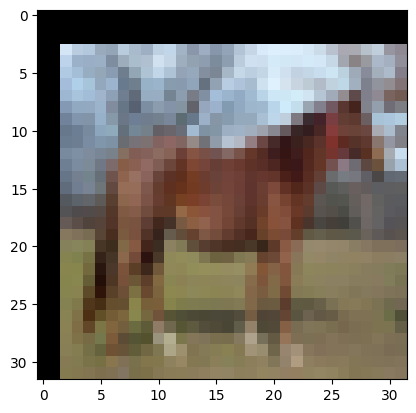

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def denomalize(img,mean,std):
    mean = torch.tensor(mean).view(3,1,1)
    std = torch.tensor(std).view(3,1,1)
    return img*std + mean

def View_img(image):
    mean=(0.4914,0.4822,0.4465)
    std=(0.247,0.243,0.261)
    
    img_data = denomalize(image,mean,std)
    img_data = img_data.numpy()
    plt.imshow(np.transpose(img_data,(1,2,0)))
    plt.show()

View_img(images[13])

In [38]:
class BasicBlock(nn.Module):
    def __init__(self,in_channels,out_channels,hidden_dim):
        super(BasicBlock,self).__init__()
        self.conv1 = nn.Conv2d(in_channels , hidden_dim, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(hidden_dim,out_channels,kernel_size=3,padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        return x
    

class Vgg16(nn.Module):
    def __init__(self, num_classes):
        super(Vgg16,self).__init__()

        self.block1 = BasicBlock(in_channels=3,out_channels=32, hidden_dim=16) #16*16
        self.block2 = BasicBlock(in_channels=32,out_channels=128, hidden_dim=64) #8*8
        self.block3 = BasicBlock(in_channels=128,out_channels=256, hidden_dim=128) #4*4
   
        #256 * 4* 4 = 4096
        self.fc1 = nn.Linear(in_features=4096, out_features=2048)
        self.fc2 = nn.Linear(in_features=2048, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=num_classes)

        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = torch.flatten(x,start_dim=1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x
    

model = Vgg16(10)
model
        

Vgg16(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=25

In [39]:
from torch.utils.tensorboard import SummaryWriter
import tqdm

writer = SummaryWriter()
lr = 1e-3
optim = Adam(model.parameters(),lr=lr)
criterion = nn.CrossEntropyLoss()
epochs = 20

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
step = 0
for epoch in range(epochs):
    for data,label in tqdm.tqdm(train_loader):
        optim.zero_grad()

        preds = model(data.to(device))
        loss = criterion(preds,label.to(device))

        loss.backward()
        optim.step()

        writer.add_scalar("Loss/train",loss.item(),step)
        step+=1

    print(f"{epoch} loss : {loss.item()}")

100%|██████████| 1563/1563 [00:45<00:00, 34.47it/s]


0 loss : 1.3996410369873047


100%|██████████| 1563/1563 [00:44<00:00, 35.27it/s]


1 loss : 0.7298486232757568


100%|██████████| 1563/1563 [00:37<00:00, 41.21it/s]


2 loss : 0.7489106059074402


100%|██████████| 1563/1563 [00:41<00:00, 37.83it/s]


3 loss : 0.6662397384643555


100%|██████████| 1563/1563 [00:43<00:00, 35.57it/s]


4 loss : 0.8913773894309998


100%|██████████| 1563/1563 [00:43<00:00, 36.33it/s]


5 loss : 0.7981840372085571


100%|██████████| 1563/1563 [00:41<00:00, 37.45it/s]


6 loss : 0.7022194862365723


100%|██████████| 1563/1563 [00:43<00:00, 35.66it/s]


7 loss : 0.4640849232673645


100%|██████████| 1563/1563 [00:46<00:00, 33.34it/s]


8 loss : 0.6845380067825317


100%|██████████| 1563/1563 [00:54<00:00, 28.65it/s]


9 loss : 0.4649575352668762


100%|██████████| 1563/1563 [00:56<00:00, 27.75it/s]


10 loss : 0.7353265285491943


100%|██████████| 1563/1563 [00:58<00:00, 26.90it/s]


11 loss : 0.5177544355392456


100%|██████████| 1563/1563 [00:56<00:00, 27.46it/s]


12 loss : 0.5296742916107178


100%|██████████| 1563/1563 [00:54<00:00, 28.75it/s]


13 loss : 0.5280072689056396


100%|██████████| 1563/1563 [00:55<00:00, 28.39it/s]


14 loss : 1.1774576902389526


100%|██████████| 1563/1563 [00:54<00:00, 28.55it/s]


15 loss : 0.350548654794693


100%|██████████| 1563/1563 [00:56<00:00, 27.47it/s]


16 loss : 0.4470527172088623


100%|██████████| 1563/1563 [00:52<00:00, 29.73it/s]


17 loss : 0.7459014654159546


100%|██████████| 1563/1563 [00:54<00:00, 28.83it/s]


18 loss : 0.5406267046928406


100%|██████████| 1563/1563 [00:47<00:00, 33.08it/s]

19 loss : 0.09398724883794785


In [45]:
from torchvision.models.vgg import vgg16

model = vgg16(pretrained=True)
model

c:\POTENUP\08_Deep_Learning_Analysis_Study\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\POTENUP\08_Deep_Learning_Analysis_Study\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [46]:
fc = nn.Sequential(
    nn.Linear(25088,4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096,10)
)

model.classifier = fc
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1